Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [1]:
%run ImportFunctions.ipynb

2024-04-02 17:27:01.076235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 17:27:03.231723: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-02 17:27:03.231770: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-02 17:27:08.910012: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

# [2] Import Libraries

In [2]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_fscore_support,
)
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [ ]:
# Load images and labels
augmented_images = np.load('/content/drive/My Drive/FYP/dataset/augmented_images.npy')
augmented_labels = np.load('/content/drive/My Drive/FYP/dataset/augmented_labels.npy')

## [3.2] Jupyter

In [3]:
# Load images and labels
augmented_images = np.load('dataset/augmented_images.npy')
augmented_labels = np.load('dataset/augmented_labels.npy')

# [4] Prepare Dataset

In [4]:
augmented_images = resize_images(augmented_images, (224,224))

In [5]:
# Display array shapes
display_array_shapes(augmented_images, augmented_labels)

+--------------+---------------------+
| Array Name   | Shape               |
+==============+=====================+
| Images       | (1211, 224, 224, 3) |
+--------------+---------------------+
| Labels       | (1211,)             |
+--------------+---------------------+


In [6]:
# Get the number of unique labels
num_classes = len(np.unique(augmented_labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [7]:
# Binarize labels
augmented_labels_binarized = binarize_labels(augmented_labels)

# [5] Train Model

In [8]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(augmented_images, augmented_labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (968, 224, 224, 3) (968, 9)
Validation shape: (121, 224, 224, 3) (121, 9)
Test shape: (122, 224, 224, 3) (122, 9)


## [5.1] VGG-19

In [9]:
# Build and compile VGG19 model
vgg19_model = build_and_compile_vgg19_model(num_classes)

2024-03-26 12:39:40.811396: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-26 12:39:40.811437: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-03-26 12:39:40.812315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Train the model
vgg19_history = vgg19_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=30)

# Evaluate the model on the validation data
vgg19_loss, vgg19_accuracy = vgg19_model.evaluate(X_val, y_val)

Epoch 1/30
24/24 [==============================] - 32s 1s/step - loss: 2.2108 - accuracy: 0.3533 - val_loss: 1.5617 - val_accuracy: 0.5702
Epoch 2/30
24/24 [==============================] - 30s 1s/step - loss: 0.7798 - accuracy: 0.7438 - val_loss: 1.5549 - val_accuracy: 0.5207
Epoch 3/30
24/24 [==============================] - 30s 1s/step - loss: 0.4392 - accuracy: 0.8915 - val_loss: 1.2030 - val_accuracy: 0.5537
Epoch 4/30
24/24 [==============================] - 30s 1s/step - loss: 0.2483 - accuracy: 0.9638 - val_loss: 1.1903 - val_accuracy: 0.5950
Epoch 5/30
24/24 [==============================] - 30s 1s/step - loss: 0.1570 - accuracy: 0.9897 - val_loss: 1.1429 - val_accuracy: 0.5785
Epoch 6/30
24/24 [==============================] - 30s 1s/step - loss: 0.1438 - accuracy: 0.9773 - val_loss: 1.0892 - val_accuracy: 0.6281
Epoch 7/30
24/24 [==============================] - 30s 1s/step - loss: 0.0813 - accuracy: 0.9990 - val_loss: 1.1285 - val_accuracy: 0.5868
Epoch 8/30
24/24 [==

In [11]:
# Calculate average loss and accuracy
vgg19_average_loss = sum(vgg19_history.history['val_loss']) / len(vgg19_history.history['val_loss'])
vgg19_average_accuracy = sum(vgg19_history.history['val_accuracy']) / len(vgg19_history.history['val_accuracy'])

print(f"Average Validation Loss: {vgg19_average_loss}, Average Validation Accuracy: {vgg19_average_accuracy}")

Average Validation Loss: 1.2060467799504597, Average Validation Accuracy: 0.6099173585573833


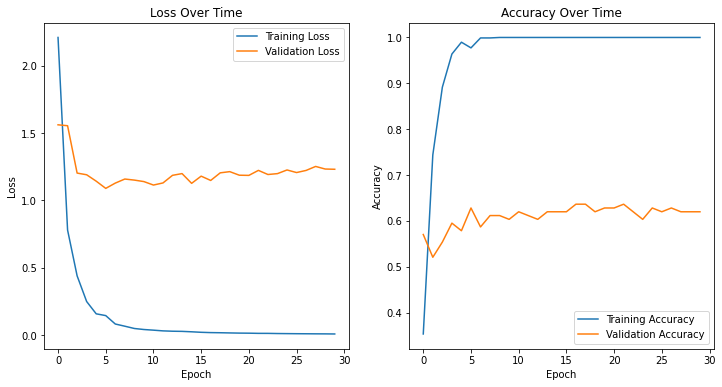

In [12]:
plot_training_history(vgg19_history)

## [5.2] ResNet-101

In [13]:
# Build and compile ResNet101 model
resnet101_model = build_and_compile_resnet101_model(num_classes)

In [14]:
# Train the model
resnet101_history = resnet101_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=30)

# Evaluate the model on the validation data
resnet101_loss, resnet101_accuracy = resnet101_model.evaluate(X_val, y_val)

Epoch 1/30
24/24 [==============================] - 37s 1s/step - loss: 7.3450 - accuracy: 0.1312 - val_loss: 3.5307 - val_accuracy: 0.2314
Epoch 2/30
24/24 [==============================] - 33s 1s/step - loss: 3.2917 - accuracy: 0.2087 - val_loss: 2.1514 - val_accuracy: 0.3223
Epoch 3/30
24/24 [==============================] - 33s 1s/step - loss: 2.1274 - accuracy: 0.2769 - val_loss: 3.6974 - val_accuracy: 0.0909
Epoch 4/30
24/24 [==============================] - 32s 1s/step - loss: 2.3437 - accuracy: 0.2841 - val_loss: 2.5099 - val_accuracy: 0.2479
Epoch 5/30
24/24 [==============================] - 33s 1s/step - loss: 1.9344 - accuracy: 0.3605 - val_loss: 3.1349 - val_accuracy: 0.1074
Epoch 6/30
24/24 [==============================] - 33s 1s/step - loss: 2.0619 - accuracy: 0.3564 - val_loss: 2.3507 - val_accuracy: 0.3388
Epoch 7/30
24/24 [==============================] - 33s 1s/step - loss: 1.9140 - accuracy: 0.3967 - val_loss: 3.0089 - val_accuracy: 0.1074
Epoch 8/30
24/24 [==

In [15]:
# Calculate average loss and accuracy
resnet101_average_loss = sum(resnet101_history.history['val_loss']) / len(resnet101_history.history['val_loss'])
resnet101_average_accuracy = sum(resnet101_history.history['val_accuracy']) / len(resnet101_history.history['val_accuracy'])

print(f"Average Validation Loss: {resnet101_average_loss}, Average Validation Accuracy: {resnet101_average_accuracy}")

Average Validation Loss: 2.8585646947224936, Average Validation Accuracy: 0.24600551091134548


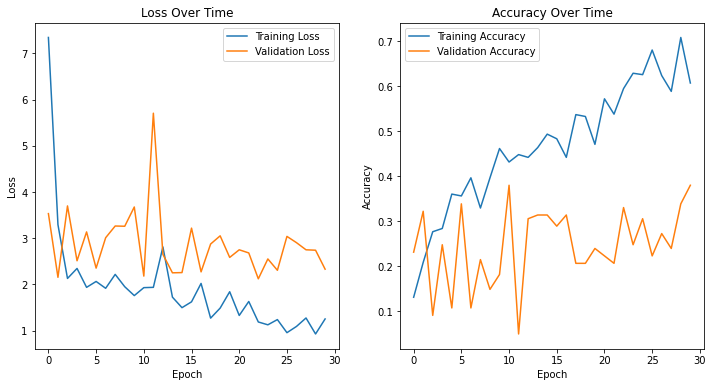

In [16]:
# Plot training history
plot_training_history(resnet101_history)

## [5.3] MobileNetV2

In [17]:
from tensorflow.keras.applications import MobileNetV2

# Build and compile MobileNetV3 model
mobilenetv2_model = build_and_compile_mobilenetv2_model(num_classes)

In [18]:
# Train the model
mobilenetv2_history = mobilenetv2_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=30)

# Evaluate the model on the validation data
mobilenetv2_loss, mobilenetv2_accuracy = mobilenetv2_model.evaluate(X_val, y_val)

Epoch 1/30
24/24 [==============================] - 8s 256ms/step - loss: 6.2663 - accuracy: 0.5517 - val_loss: 5.4409 - val_accuracy: 0.6033
Epoch 2/30
24/24 [==============================] - 5s 211ms/step - loss: 1.0209 - accuracy: 0.8884 - val_loss: 2.7586 - val_accuracy: 0.7273
Epoch 3/30
24/24 [==============================] - 5s 221ms/step - loss: 0.2070 - accuracy: 0.9669 - val_loss: 3.5226 - val_accuracy: 0.7355
Epoch 4/30
24/24 [==============================] - 5s 225ms/step - loss: 0.0771 - accuracy: 0.9835 - val_loss: 2.0049 - val_accuracy: 0.8264
Epoch 5/30
24/24 [==============================] - 5s 227ms/step - loss: 0.0641 - accuracy: 0.9876 - val_loss: 3.3168 - val_accuracy: 0.7438
Epoch 6/30
24/24 [==============================] - 6s 235ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 2.3292 - val_accuracy: 0.8017
Epoch 7/30
24/24 [==============================] - 6s 233ms/step - loss: 0.0104 - accuracy: 0.9979 - val_loss: 2.6575 - val_accuracy: 0.7686
Epoch 

In [19]:
# Calculate average loss and accuracy
mobilenetv2_average_loss = sum(mobilenetv2_history.history['val_loss']) / len(mobilenetv2_history.history['val_loss'])
mobilenetv2_average_accuracy = sum(mobilenetv2_history.history['val_accuracy']) / len(mobilenetv2_history.history['val_accuracy'])

print(f"Average Validation Loss: {mobilenetv2_average_loss}, Average Validation Accuracy: {mobilenetv2_average_accuracy}")

Average Validation Loss: 2.443776273727417, Average Validation Accuracy: 0.7738291958967844


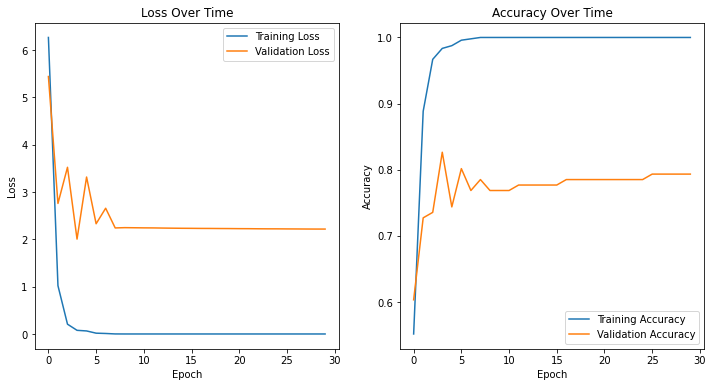

In [20]:
# Plot training history
plot_training_history(mobilenetv2_history)

## [5.4] EfficientNet-B0

In [21]:
from tensorflow.keras.applications import EfficientNetB0

# Build and compile EfficientNet model
efficientnet_model = build_and_compile_efficientnet_model(num_classes)

In [22]:
# Train the model
efficientnet_history = efficientnet_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=30)

# Evaluate the model on the validation data
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_val, y_val)

Epoch 1/30
24/24 [==============================] - 17s 498ms/step - loss: 17.0187 - accuracy: 0.1271 - val_loss: 13.8442 - val_accuracy: 0.0744
Epoch 2/30
24/24 [==============================] - 10s 432ms/step - loss: 6.6922 - accuracy: 0.1209 - val_loss: 2.8886 - val_accuracy: 0.1736
Epoch 3/30
24/24 [==============================] - 10s 422ms/step - loss: 3.2907 - accuracy: 0.1343 - val_loss: 3.6186 - val_accuracy: 0.0744
Epoch 4/30
24/24 [==============================] - 10s 417ms/step - loss: 3.1792 - accuracy: 0.1219 - val_loss: 3.6254 - val_accuracy: 0.0413
Epoch 5/30
24/24 [==============================] - 10s 422ms/step - loss: 3.0377 - accuracy: 0.1209 - val_loss: 3.6431 - val_accuracy: 0.1901
Epoch 6/30
24/24 [==============================] - 10s 415ms/step - loss: 3.4954 - accuracy: 0.1374 - val_loss: 5.5259 - val_accuracy: 0.1736
Epoch 7/30
24/24 [==============================] - 10s 416ms/step - loss: 4.1233 - accuracy: 0.1467 - val_loss: 4.2542 - val_accuracy: 0.16

In [23]:
# Calculate average loss and accuracy
efficientnet_average_loss = sum(efficientnet_history.history['val_loss']) / len(efficientnet_history.history['val_loss'])
efficientnet_average_accuracy = sum(efficientnet_history.history['val_accuracy']) / len(efficientnet_history.history['val_accuracy'])

print(f"Average Validation Loss: {efficientnet_average_loss}, Average Validation Accuracy: {efficientnet_average_accuracy}")

Average Validation Loss: 5.310521777470907, Average Validation Accuracy: 0.13195592239499093


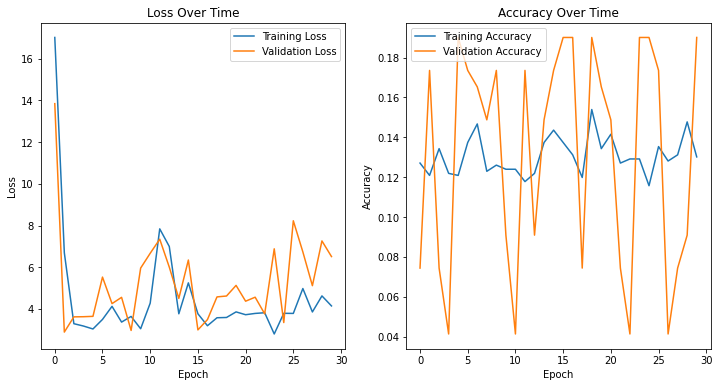

In [24]:
# Plot training history
plot_training_history(efficientnet_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save models
vgg19_model.save('/content/drive/MyDrive/FYP/models/VGG19_augment_30epochs')
resnet101_model.save('/content/drive/MyDrive/FYP/models/ResNet101_augment_30epochs')
mobilenetv2_model.save('/content/drive/MyDrive/FYP/models/MobileNetV2_augment_30epochs')
efficientnet_model.save('/content/drive/MyDrive/FYP/models/EfficientNetB0_augment_30epochs')

## [6.2] Jupyter

In [54]:
# Save models
vgg19_model.save('models/VGG19_augment_30epochs')
resnet101_model.save('models/ResNet101_augment_30epochs')
mobilenetv2_model.save('models/MobileNetV2_augment_30epochs')

# Save EfficientNet model in SavedModel format
tf.saved_model.save(efficientnet_model, 'models/EfficientNetB0_augment_30epochs')

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7ffef501ecb0>
Traceback (most recent call last):
  File "/cm/local/apps/python37/lib/python3.7/weakref.py", line 358, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


INFO:tensorflow:Assets written to: models/EfficientNetB0_augment_30epochs.h5/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_augment_30epochs.h5/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/VGG19_augment_30epochs')
loaded_resnet101_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/ResNet101_augment_30epochs')
loaded_mobilenetv2_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/MobileNetV2_augment_30epochs')
loaded_efficientnet_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/EfficientNetB0_augment_30epochs')

## [6.2] Jupyter

In [9]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('models/VGG19_augment_30epochs')
loaded_resnet101_model = tf.keras.models.load_model('models/ResNet101_augment_30epochs')
loaded_mobilenetv2_model = tf.keras.models.load_model('models/MobileNetV2_augment_30epochs')
loaded_efficientnet_model = tf.saved_model.load('models/EfficientNetB0_augment_30epochs')

2024-04-02 17:28:38.228397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 17:28:38.228499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 17:28:38.230046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# [7] Test and Analyse

## [7.1] VGG-19

In [56]:
# Evaluate the model on the test data
vgg19_test_loss, vgg19_test_accuracy = loaded_vgg19_model.evaluate(X_test, y_test)
print(f"Test Loss: {vgg19_test_loss}, Test Accuracy: {vgg19_test_accuracy}")

4/4 [==============================] - 7s 1s/step - loss: 1.0388 - accuracy: 0.6967
Test Loss: 1.0388028621673584, Test Accuracy: 0.6967213153839111


In [11]:
vgg19_predicted_labels, vgg19_true_labels_list = make_predictions_and_evaluate(loaded_vgg19_model, X_test, y_test)

2024-04-02 17:32:59.197928: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-02 17:32:59.617859: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


1/4 [======>.......................] - ETA: 10s - loss: 0.7441 - accuracy: 0.7500

2024-04-02 17:33:01.340964: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-02 17:33:01.383171: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


2/4 [==============>...............] - ETA: 3s - loss: 1.1543 - accuracy: 0.6406 

2024-04-02 17:33:03.129118: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


4/4 [==============================] - 7s 2s/step


In [12]:
calculate_classification_metrics(vgg19_true_labels_list, vgg19_predicted_labels)

Accuracy: 0.6967
Precision: 0.6393
Recall: 0.6315
F1 Score: 0.6354


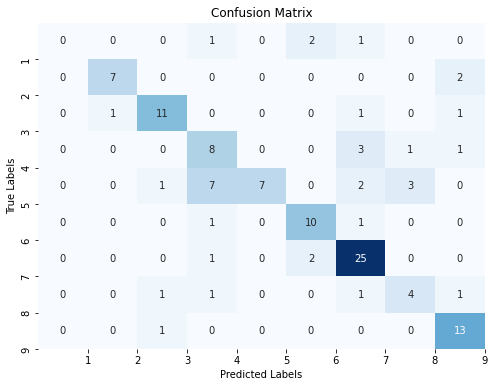

In [13]:
display_confusion_matrix(vgg19_true_labels_list, vgg19_predicted_labels)

## [7.2] ResNet-101

In [32]:
# Evaluate the model on the test data
resnet101_test_loss, resnet101_test_accuracy = loaded_resnet101_model.evaluate(X_test, y_test)
print(f"Test Loss: {resnet101_test_loss}, Test Accuracy: {resnet101_test_accuracy}")

4/4 [==============================] - 4s 726ms/step - loss: 2.2792 - accuracy: 0.3033
Test Loss: 2.279157876968384, Test Accuracy: 0.30327868461608887


In [14]:
resnet101_predicted_labels, resnet101_true_labels_list = make_predictions_and_evaluate(loaded_resnet101_model, X_test, y_test)

4/4 [==============================] - 9s 2s/step


In [15]:
calculate_classification_metrics(resnet101_true_labels_list, resnet101_predicted_labels)

Accuracy: 0.3033
Precision: 0.3728
Recall: 0.2926
F1 Score: 0.3278


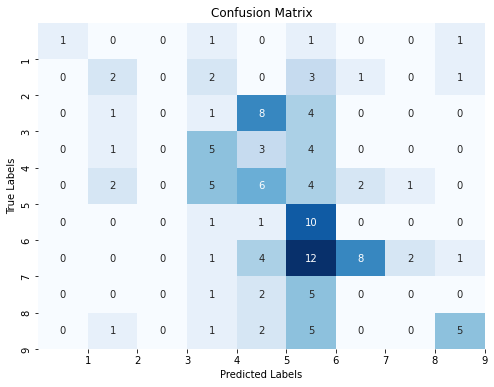

In [16]:
display_confusion_matrix(resnet101_true_labels_list, resnet101_predicted_labels)

## [7.3] MobileNetV2

In [36]:
# Evaluate the model on the test data
mobilenetv2_test_loss, mobilenetv2_test_accuracy = loaded_mobilenetv2_model.evaluate(X_test, y_test)
print(f"Test Loss: {mobilenetv2_test_loss}, Test Accuracy: {mobilenetv2_test_accuracy}")

4/4 [==============================] - 1s 165ms/step - loss: 3.0040 - accuracy: 0.7705
Test Loss: 3.003962755203247, Test Accuracy: 0.7704917788505554


In [17]:
mobilenetv2_predicted_labels, mobilenetv2_true_labels_list = make_predictions_and_evaluate(loaded_mobilenetv2_model, X_test, y_test)

4/4 [==============================] - 2s 262ms/step


In [18]:
calculate_classification_metrics(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

Accuracy: 0.7705
Precision: 0.7407
Recall: 0.7143
F1 Score: 0.7273


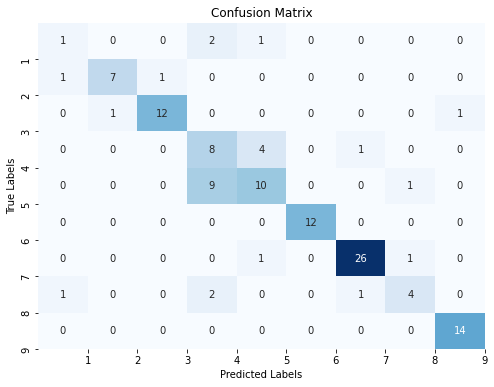

In [19]:
display_confusion_matrix(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

## [7.4] EfficientNet-B0

In [21]:
# Extract the 'serving_default' signature
signature = loaded_efficientnet_model.signatures['serving_default']

# Get the inference function or model signature
infer = signature

# Convert input data to float32 if it's not already
efficientnet_X_test = X_test.astype(np.float32)

# Perform evaluation on test data
output = infer(tf.constant(efficientnet_X_test))
predictions = output[list(output.keys())[0]]  # Adjust this based on the output key of your model

# Convert probabilities to class labels (assuming one-hot encoding)
efficientnet_predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels (assuming one-hot encoding)
efficientnet_true_labels = np.argmax(y_test, axis=1)

# Calculate test loss
efficientnet_test_loss = tf.keras.losses.categorical_crossentropy(y_test, predictions).numpy().mean()

# Calculate evaluation metrics (e.g., accuracy)
efficientnet_test_accuracy = np.mean(efficientnet_predicted_labels == efficientnet_true_labels)
print(f"Test Loss: {efficientnet_test_loss}, Test Accuracy: {efficientnet_test_accuracy}")

Test Loss: 6.937080383300781, Test Accuracy: 0.11475409836065574


In [22]:
calculate_classification_metrics(efficientnet_true_labels, efficientnet_predicted_labels)

Accuracy: 0.1148
Precision: 0.0128
Recall: 0.1111
F1 Score: 0.0229


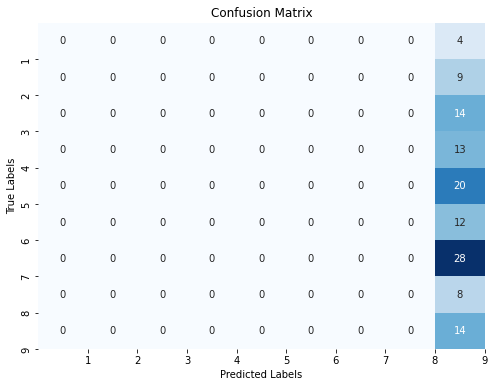

In [23]:
display_confusion_matrix(efficientnet_true_labels, efficientnet_predicted_labels)